<a href="https://colab.research.google.com/github/Dannyhamtar/MachineLearning/blob/main/Task%20week%2011/CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Danny Hamtar Pangestu

NIM : 1103210037

Lecture: Cifar10

#Import Libraries

In [12]:
# Langkah 1: Import Library
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt


#Memuat dan Pra-Pemrosesan Dataset

In [3]:
# Langkah 2: Memuat dan Pra-Pemrosesan Dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 [==============================] - 2s 0us/step


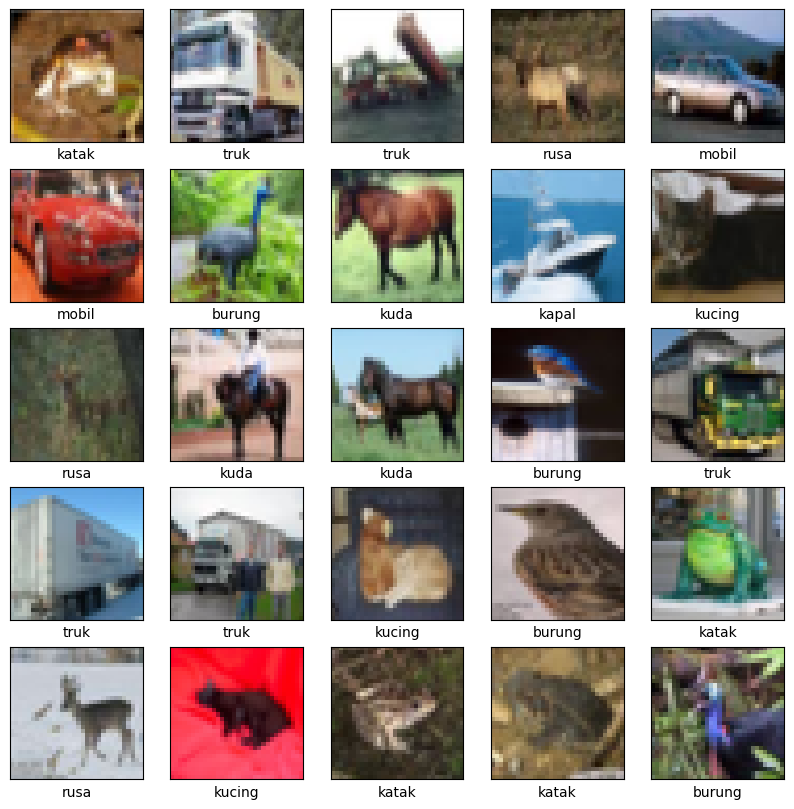

In [4]:
# Label kelas untuk CIFAR-10
class_names = ['pesawat', 'mobil', 'burung', 'kucing', 'rusa', 'anjing', 'katak', 'kuda', 'kapal', 'truk']

# Menampilkan beberapa gambar dari dataset
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

#Mendefinisikan Model CNN

In [5]:
# Langkah 4: Mendefinisikan Model CNN
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Langkah 5: Menambahkan Layer Dense

In [11]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

# Langkah 6: Mengompilasi Model

In [9]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Langkah 7: Pelatihan

In [10]:
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))


Epoch 1/10
1563/1563 [==============================] - 91s 57ms/step - loss: 1.5058 - accuracy: 0.4478 - val_loss: 1.1929 - val_accuracy: 0.5715
Epoch 2/10
1563/1563 [==============================] - 73s 47ms/step - loss: 1.1271 - accuracy: 0.5977 - val_loss: 1.0774 - val_accuracy: 0.6179
Epoch 3/10
1563/1563 [==============================] - 65s 42ms/step - loss: 0.9774 - accuracy: 0.6558 - val_loss: 0.9666 - val_accuracy: 0.6652
Epoch 4/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.8841 - accuracy: 0.6903 - val_loss: 0.9297 - val_accuracy: 0.6711
Epoch 5/10
1563/1563 [==============================] - 65s 41ms/step - loss: 0.8085 - accuracy: 0.7158 - val_loss: 0.9032 - val_accuracy: 0.6846
Epoch 6/10
1563/1563 [==============================] - 65s 41ms/step - loss: 0.7520 - accuracy: 0.7382 - val_loss: 0.8732 - val_accuracy: 0.6995
Epoch 7/10
1563/1563 [==============================] - 66s 42ms/step - loss: 0.6986 - accuracy: 0.7542 - val_loss: 0.8571 -

# Langkah 8: Evaluasi Model

In [13]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nAkurasi Pengujian:', test_acc)

313/313 - 6s - loss: 0.9250 - accuracy: 0.7060 - 6s/epoch - 19ms/step

Akurasi Pengujian: 0.7059999704360962


# Langkah 9: Visualisasi Riwayat Pelatihan

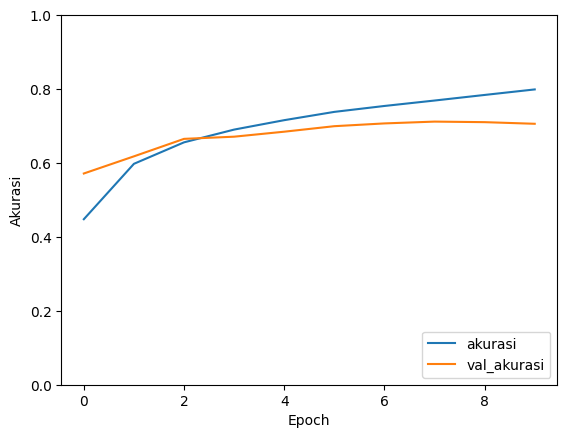

In [14]:
plt.plot(history.history['accuracy'], label='akurasi')
plt.plot(history.history['val_accuracy'], label = 'val_akurasi')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

# Langkah 10: Prediksi

In [15]:
predictions = model.predict(test_images)

313/313 [==============================] - 5s 16ms/step


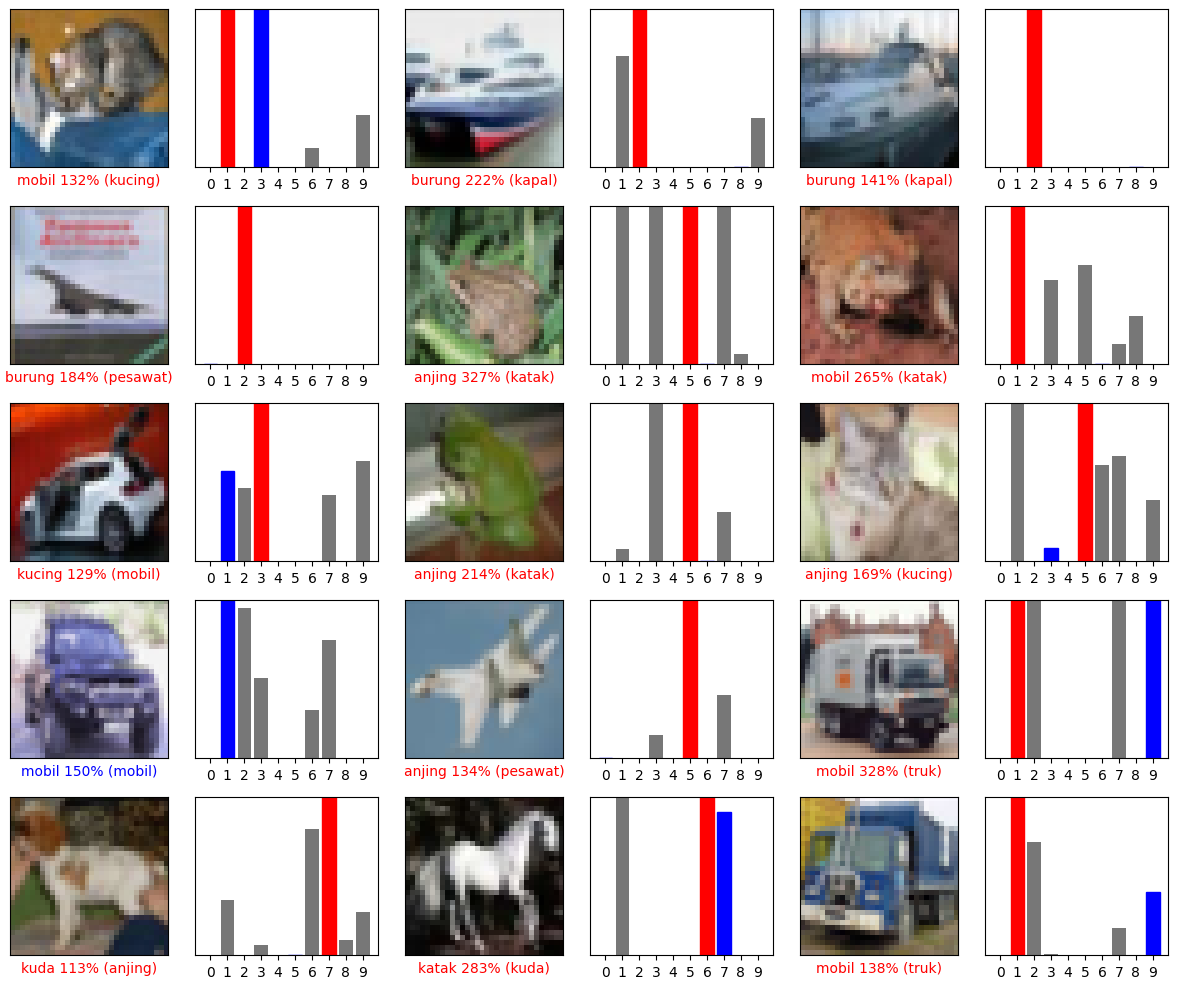

In [17]:
import numpy as np

# Fungsi untuk menampilkan gambar beserta label prediksi
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i][0], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

# Fungsi untuk menampilkan bar plot prediksi
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i][0]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

# Menampilkan gambar, label prediksi, dan probabilitas untuk beberapa gambar
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)
plt.tight_layout()
plt.show()
